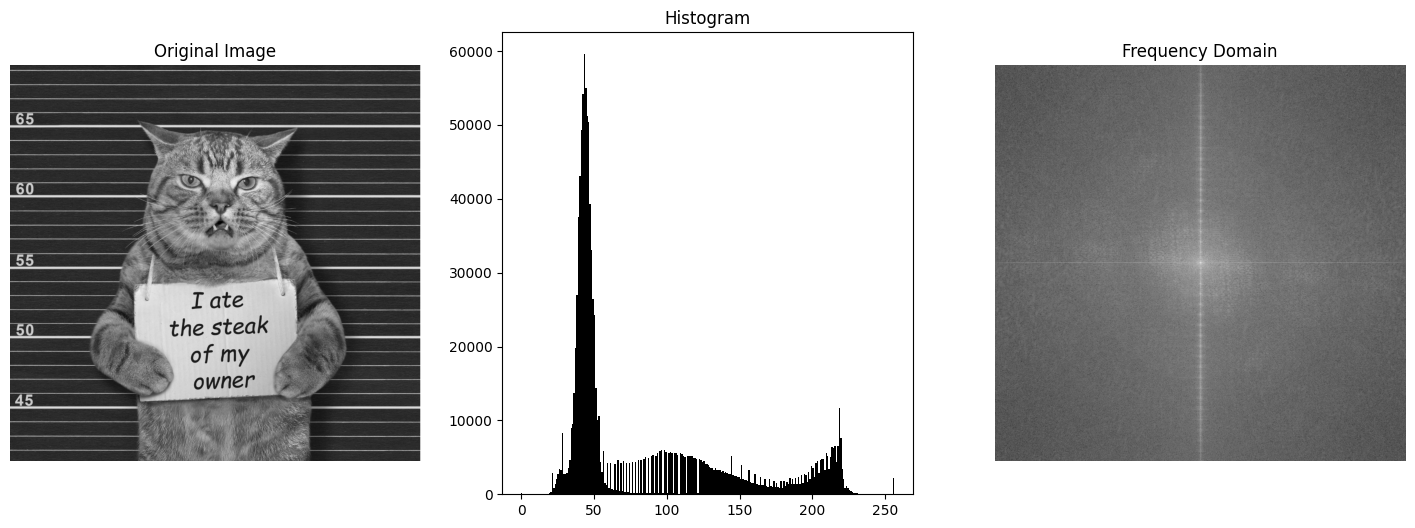

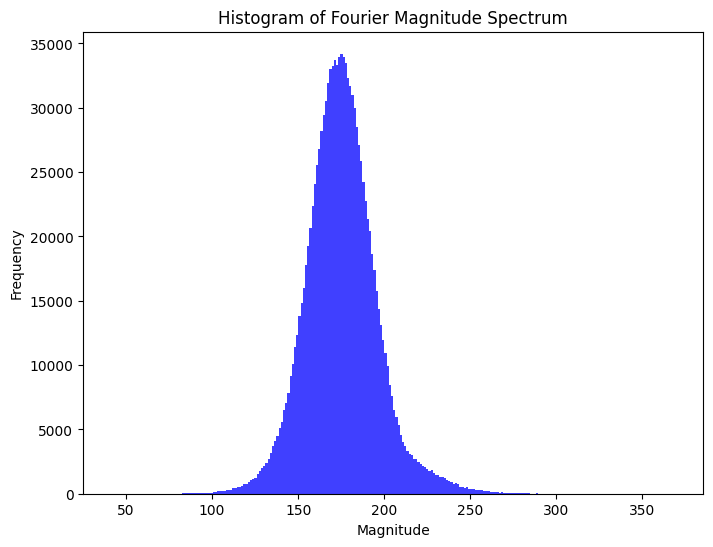

In [8]:
import cv2  # OpenCV 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
from numpy.fft import fft2, fftshift, ifftshift    # 用於頻率域轉換

# 讀取圖片，使用灰階模式
image = cv2.imread('F:\Code\Digital-Image-Processing\Code\Resources\Data\cat.jpg', cv2.IMREAD_GRAYSCALE)

# 顯示原圖
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 顯示直方圖
plt.subplot(1, 3, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram')

# 計算並顯示頻率域圖
f_transform = fft2(image)  # 進行2D快速傅立葉變換
f_transform_shifted = fftshift(f_transform)  # 移動零頻率成分到中心
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # 計算頻譜的幅度

plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain')
plt.axis('off')

# 顯示所有圖像
plt.show()

# 顯示傅立葉頻譜的直方圖
plt.figure(figsize=(8, 6))
plt.hist(magnitude_spectrum.ravel(), bins=256, color='blue', alpha=0.75)
plt.title('Histogram of Fourier Magnitude Spectrum')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

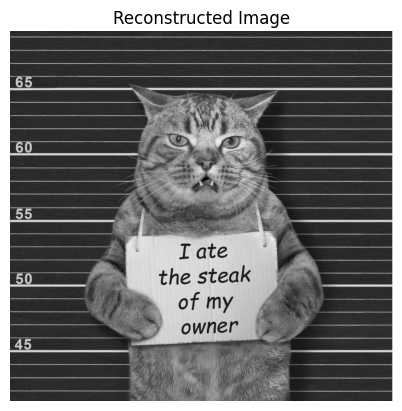

In [10]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift  # 用於頻率域轉換

# 逆傅立葉變換將頻譜轉換回空間域
f_transform_ishift = ifftshift(f_transform_shifted)  # 將零頻率成分移回原來位置
image_back = ifft2(f_transform_ishift)  # 進行2D逆快速傅立葉變換
image_back = np.abs(image_back)  # 取實部，得到重建圖像

plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

In [10]:
def basic_array_info(array):
    print("Type: ", type(array))
    print("Shape: ", array.shape)
    print("Max: ", array.max())
    print("Min: ", array.min())
    print("Mean: ", array.mean())

# basic_array_info(f_transform)

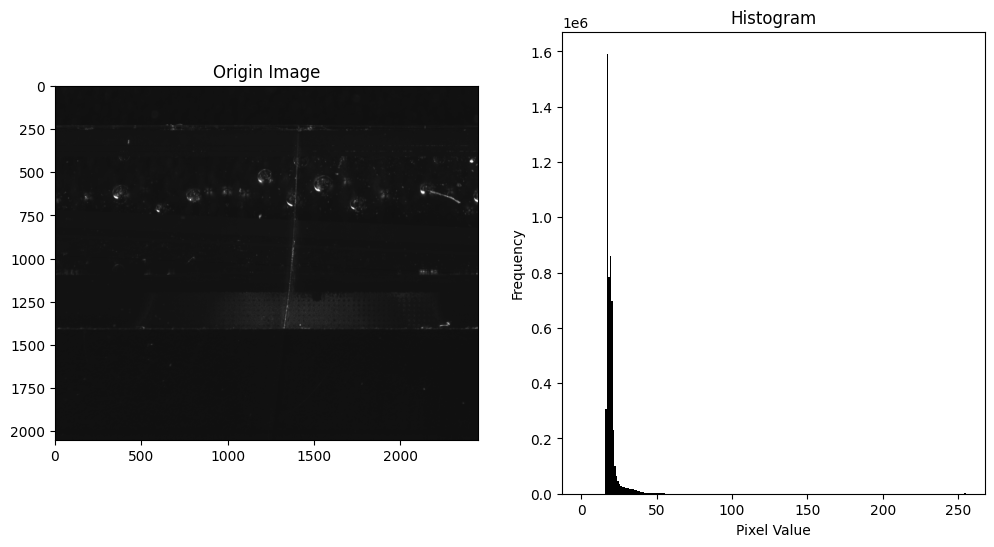

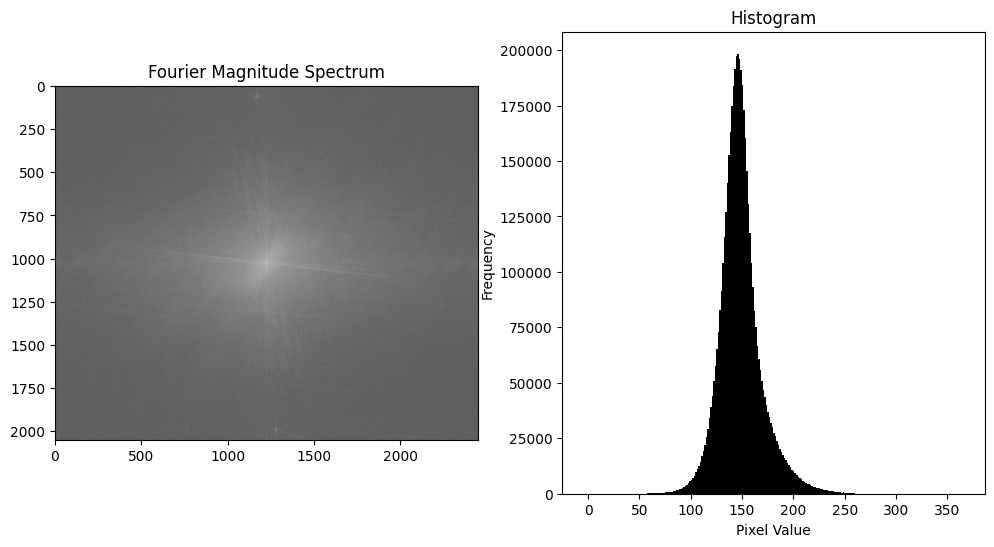

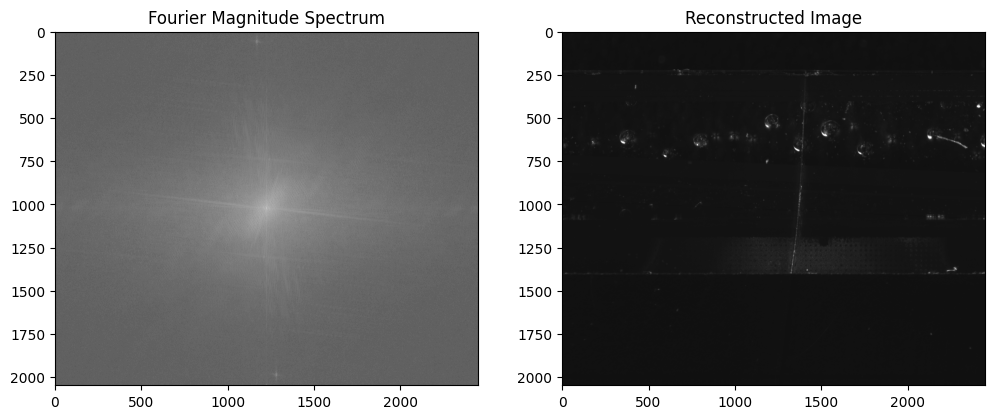

array([[1.77650385e-15, 1.00000000e+00, 1.60000000e+02, ...,
        1.70000000e+01, 1.70000000e+01, 1.70000000e+01],
       [2.20000000e+01, 2.20000000e+01, 2.20000000e+01, ...,
        1.70000000e+01, 1.70000000e+01, 1.70000000e+01],
       [2.10000000e+01, 2.20000000e+01, 2.10000000e+01, ...,
        1.70000000e+01, 1.80000000e+01, 1.70000000e+01],
       ...,
       [1.70000000e+01, 1.70000000e+01, 1.70000000e+01, ...,
        1.70000000e+01, 1.70000000e+01, 1.60000000e+01],
       [1.80000000e+01, 1.80000000e+01, 1.80000000e+01, ...,
        1.60000000e+01, 1.70000000e+01, 1.70000000e+01],
       [1.80000000e+01, 1.70000000e+01, 1.70000000e+01, ...,
        1.70000000e+01, 1.60000000e+01, 1.60000000e+01]])

In [195]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
from numpy.fft import fft2, ifft2, fftshift, ifftshift  # 用於頻率域轉換

def histogram_show(image, title):
    """顯示圖片的直方圖"""
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    # plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

def fourier_show(image):
    """計算並顯示傅立葉頻譜和直方圖"""
    f_transform = fft2(image)  # 進行2D快速傅立葉變換
    f_transform_shifted = fftshift(f_transform)  # 移動零頻率成分到中心
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # 計算頻譜的幅度
    
    histogram_show(magnitude_spectrum, title='Fourier Magnitude Spectrum')
    
    return f_transform_shifted

def i_fourier_show(f_transform_shifted):
    """進行逆傅立葉變換並顯示重建的圖片"""
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))
    
    f_transform_ishift = ifftshift(f_transform_shifted)  # 將零頻率成分移回原來位置
    image_back = ifft2(f_transform_ishift)  # 進行2D逆快速傅立葉變換
    image_back = np.abs(image_back)  # 取實部，得到重建圖像

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Fourier Magnitude Spectrum")
    
    plt.subplot(1, 2, 2)
    plt.imshow(image_back, cmap='gray')
    plt.title('Reconstructed Image')
    # plt.axis('off')
    plt.show()
    
    return image_back

# 讀取圖片，使用灰階模式
origin = cv2.imread(r'F:\Code\Digital-Image-Processing\Code\Resources\Private_Data\line_light_ok_6cm.tif', cv2.IMREAD_GRAYSCALE)

# 顯示原圖與其直方圖
histogram_show(origin, title='Origin Image')

# 計算傅立葉變換，顯示頻譜及其直方圖
f_image = fourier_show(origin)

# 逆傅立葉變換，顯示重建圖像
i_fourier_show(f_image)




In [11]:
basic_array_info(f_image)

Type:  <class 'numpy.ndarray'>
Shape:  (2048, 2448)
Max:  (119008741+0j)
Min:  (-3806380.5120765194-413074.70109076495j)
Mean:  (-1.6672211904436338e-14-8.99498340735519e-15j)


C:\Users\112033645\AppData\Local\Temp\ipykernel_7116\2424034705.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


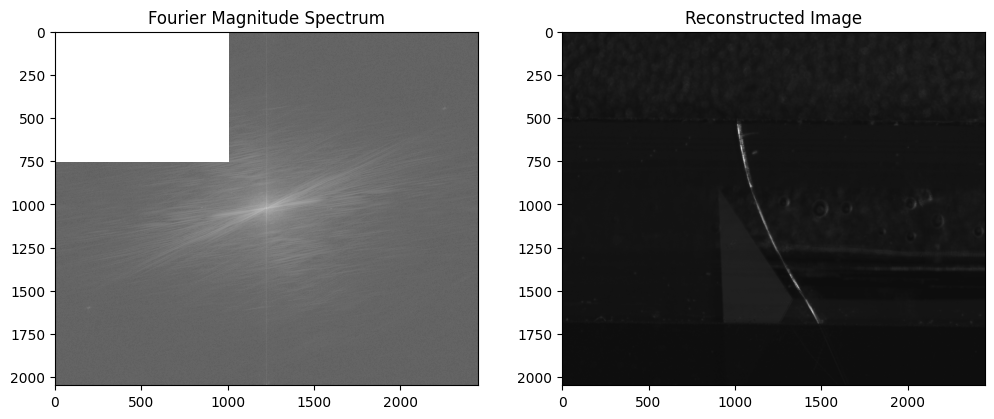

array([[ 7.93338327, 10.7835789 , 62.39484972, ..., 29.00784065,
        30.45956593, 32.00746087],
       [25.94678748, 23.92062749, 12.75906243, ..., 32.89382168,
        29.65741045, 34.92106103],
       [26.43676564, 26.82153216, 35.16076188, ..., 29.52680782,
        30.07317164, 27.83773155],
       ...,
       [16.39453812, 16.3612709 , 17.77350574, ..., 16.88995915,
        16.97871814, 16.66802105],
       [15.46406739, 14.44101471, 12.05861134, ..., 17.21929461,
        16.17348524, 17.72567106],
       [14.5042609 , 17.49031583, 35.34427498, ..., 14.90634611,
        15.87513891, 10.5912511 ]])

In [13]:
f_cp = f_image.copy()

# f_cp[:750, :1000] = 0
# f_cp[:left, right:] = 0
# f_cp[right:, :left] = 0
# f_cp[right:, right:] = 0

i_fourier_show(f_cp)

In [17]:
1763 // 2

881

In [7]:
remain = 3
left = 1763 // 2 - remain
right = 1763 // 2 + remain
left, right

(878, 884)

C:\Users\112033645\AppData\Local\Temp\ipykernel_7116\2572015702.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


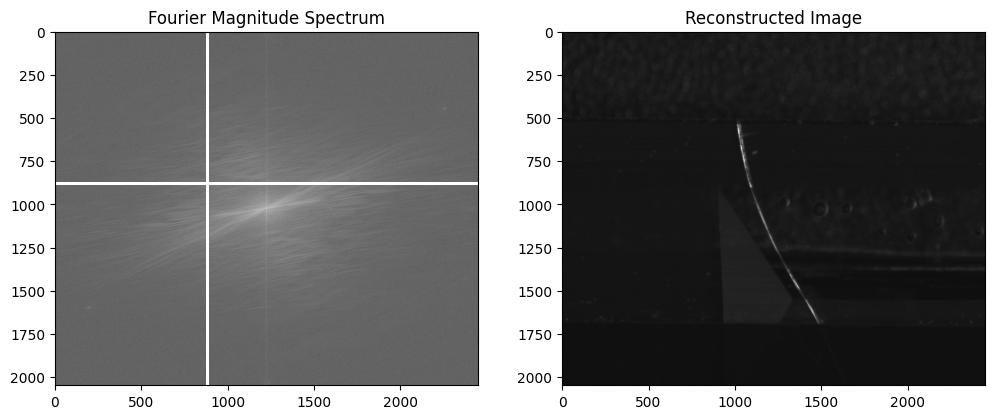

array([[ 0.67855595,  1.38968659, 56.55226624, ..., 29.66477584,
        31.09362841, 30.53550558],
       [28.00167612, 28.01873788, 27.89228803, ..., 29.93815105,
        28.88059179, 29.94604876],
       [27.91712362, 27.92601027, 28.87909558, ..., 29.93693655,
        29.88441403, 29.89826549],
       ...,
       [17.14575621, 17.14476072, 17.04659143, ..., 17.08875843,
        17.08862619, 17.13310933],
       [17.11095935, 17.11515902, 16.98736255, ..., 16.09900893,
        16.06011218, 16.10046004],
       [16.12163367, 17.12176282, 16.93758975, ..., 17.02242579,
        15.98731433, 16.07539759]])

In [6]:
f_cp = f_image.copy()

f_cp[left:right, :] = 0
f_cp[:, left:right] = 0

i_fourier_show(f_cp)

C:\Users\112033645\AppData\Local\Temp\ipykernel_10840\3159905693.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


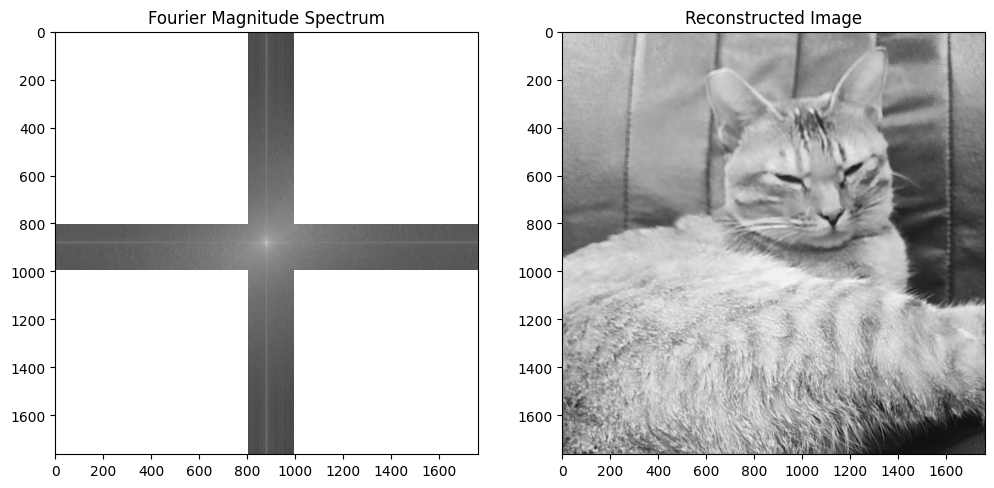

array([[215.57624341, 216.49083576, 217.29193069, ..., 172.34595145,
        170.80643136, 169.37562682],
       [212.81404502, 213.53840084, 213.88768013, ..., 174.04055789,
        171.89554623, 170.06158132],
       [211.77716265, 211.88601981, 211.4557124 , ..., 177.74781239,
        174.83275272, 172.29003828],
       ...,
       [125.83825116, 129.74856234, 135.47065306, ...,  64.55127007,
         66.06439938,  67.59349229],
       [123.39877425, 128.20432753, 134.39430558, ...,  63.82360717,
         65.24896771,  66.93676334],
       [120.69437061, 125.07783597, 130.31736137, ...,  65.75215959,
         66.66372873,  67.83780458]])

In [55]:
f_cp = f_image.copy()

f_cp[:800, :800] = 0
f_cp[:800, 1000:] = 0
f_cp[1000:, :800] = 0
f_cp[1000:, 1000:] = 0

i_fourier_show(f_cp)

In [65]:
remain = 5
left = 1763 // 2 - remain
right = 1763 // 2 + remain
left, right

(876, 886)

C:\Users\112033645\AppData\Local\Temp\ipykernel_10840\3159905693.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


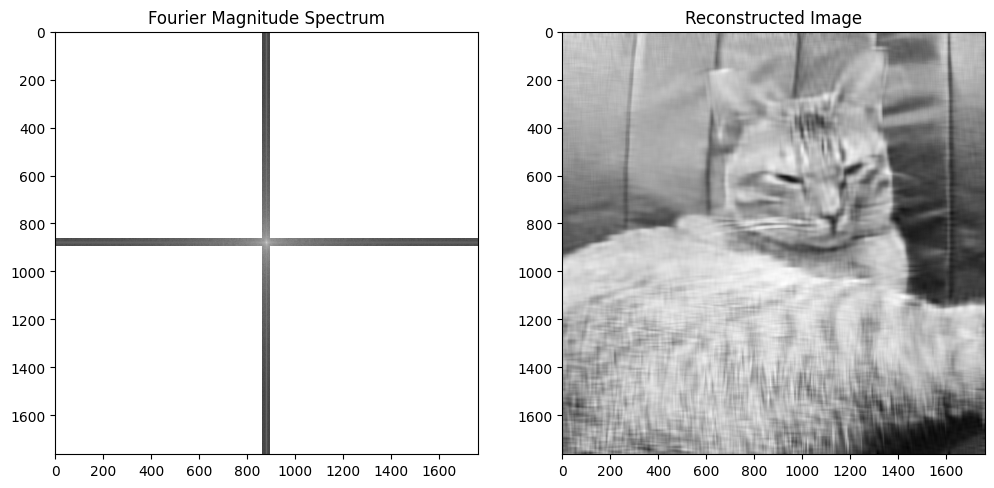

array([[203.4483822 , 202.78701341, 205.89158226, ..., 175.66705108,
        175.17056048, 174.55533117],
       [204.81479218, 204.16931641, 207.04493117, ..., 176.47571215,
        175.89585794, 175.22820104],
       [206.45142669, 205.84792842, 208.51926609, ..., 177.51458403,
        176.87803024, 176.18449829],
       ...,
       [ 99.39697872,  99.84852947, 104.81992086, ...,  70.28682389,
         71.07878812,  71.70206553],
       [103.90378438, 104.50350676, 109.37747185, ...,  73.69541695,
         74.55925306,  75.27844503],
       [109.45820956, 110.16522582, 114.89051048, ...,  78.28392722,
         79.19605985,  79.98162717]])

In [62]:
f_cp = f_image.copy()

f_cp[:left, :left] = 0
f_cp[:left, right:] = 0
f_cp[right:, :left] = 0
f_cp[right:, right:] = 0

i_fourier_show(f_cp)

In [78]:
remain = 1
left = 1763 // 2 - remain
right = 1763 // 2 + remain
left, right

(880, 882)

C:\Users\112033645\AppData\Local\Temp\ipykernel_10840\3159905693.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


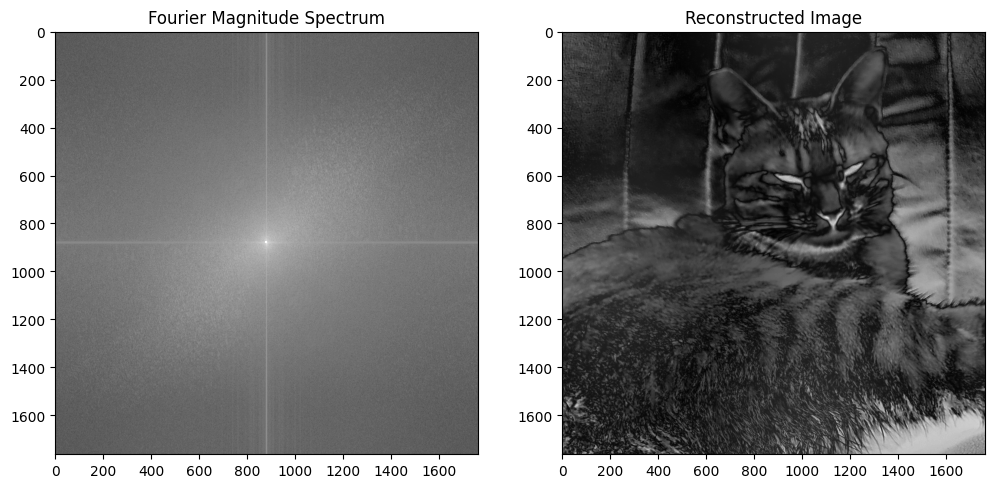

array([[55.23085025, 56.18710125, 58.1416032 , ..., 24.47198514,
        22.45141051, 19.44851989],
       [58.25283258, 58.21077333, 59.16703768, ..., 20.53750943,
        18.5259975 , 17.50417052],
       [58.27983181, 58.23781158, 59.19412959, ..., 22.54126621,
        21.51280394, 19.49869337],
       ...,
       [28.14262063, 26.20454543, 24.2694748 , ..., 89.87488031,
        88.92011079, 87.96548152],
       [29.10693876, 27.16757779, 24.24009733, ..., 88.84757943,
        87.89277842, 86.93811843],
       [28.0844699 , 28.13122013, 25.20156649, ..., 87.82023841,
        86.86540637, 84.91143815]])

In [79]:
f_cp = f_image.copy()

f_cp[left:right, left:right] = 0

i_fourier_show(f_cp)

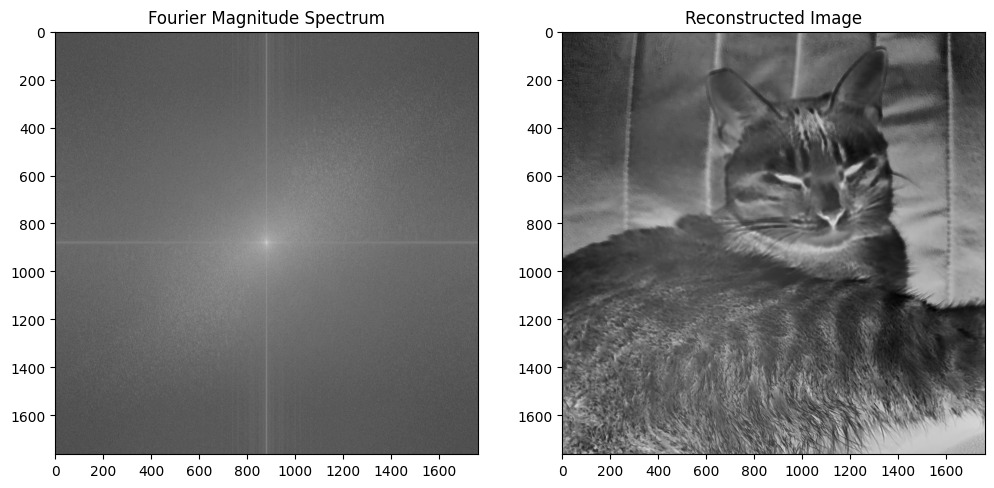

array([[ 98.94572823,  98.03893051,  96.13480503, ..., 129.62514679,
        131.71230201, 134.79850065],
       [ 95.89520751,  95.98617495,  95.07973312, ..., 133.56403392,
        135.65116352, 136.73959253],
       [ 95.83788815,  95.9287459 ,  95.02217748, ..., 131.50975274,
        132.59790247, 134.68509808],
       ...,
       [182.01648003, 180.10757015, 178.19893602, ..., 243.71953014,
        242.80851927, 241.89772916],
       [182.95964304, 181.05059359, 178.14251897, ..., 242.66423679,
        241.7531302 , 240.84224436],
       [181.90401572, 181.99354609, 179.08531812, ..., 241.60884922,
        240.69764688, 238.78703313]])

In [80]:
f_cp = f_image.copy()

f_cp[left:right, left:right] = -f_cp[left:right, left:right]

i_fourier_show(f_cp)

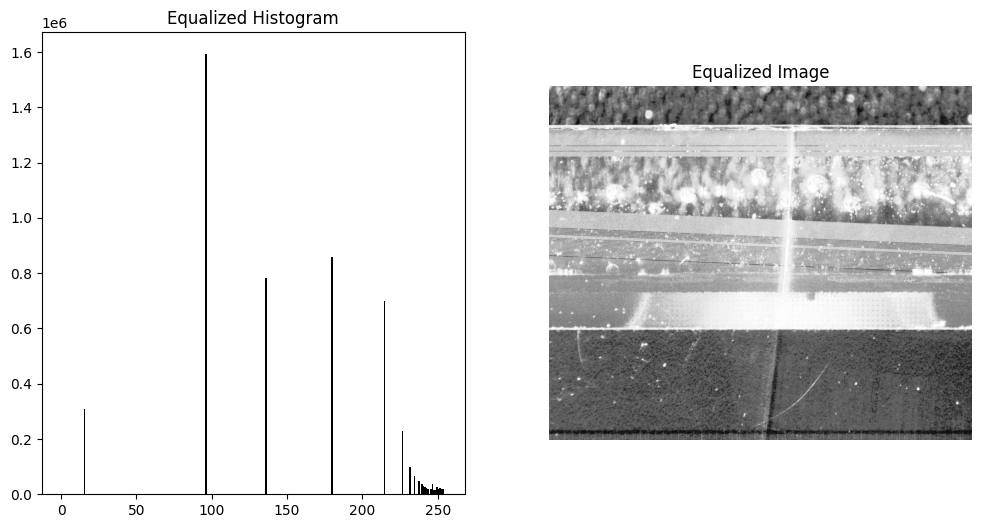

In [211]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_specification(image):
    # 計算原始圖像的直方圖
    original_hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # 計算累積直方圖
    cdf = original_hist.cumsum()
    cdf_normalized = cdf * original_hist.max() / cdf.max()  # 這一步是選擇性的，用來使CDF在顯示時更好看

    # 掩蔽CDF中的零值，避免在後續計算中出現問題
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

    # 使用累積直方圖來進行影像規範化
    image_equalized = cdf_final[image]

    # 顯示規範化後的直方圖和圖片
    plt.figure(figsize=(12, 6))
    
    # 均衡化後圖片的直方圖
    plt.subplot(1, 2, 1)
    plt.hist(image_equalized.ravel(), bins=256, color='black')
    plt.title('Equalized Histogram')
    
    # 均衡化後的圖片
    plt.subplot(1, 2, 2)
    plt.imshow(image_equalized, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()
    
    return image_equalized

# 讀取圖片，使用灰階模式
# origin = cv2.imread('F:\\Code\\Digital-Image-Processing\\Code\\Resources\\Data\\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 呼叫直方圖自動處理函數來顯示結果
hs = histogram_specification(origin)


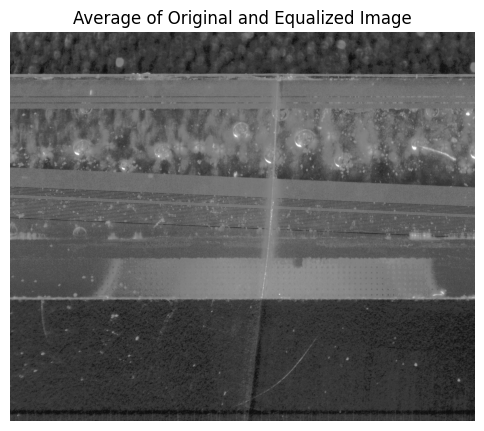

In [214]:
# 合併圖像
add_image = (origin.astype(float) + hs.astype(float)) / 2
add_image = np.clip(add_image, 0, 255).astype(np.uint8)  # 確保像素值在0到255之間

# 顯示合併後的圖像
plt.figure(figsize=(6, 6))
plt.imshow(add_image, cmap='gray')
plt.title('Average of Original and Equalized Image')
plt.axis('off')
plt.show()

C:\Users\112033645\AppData\Local\Temp\ipykernel_7116\329050467.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


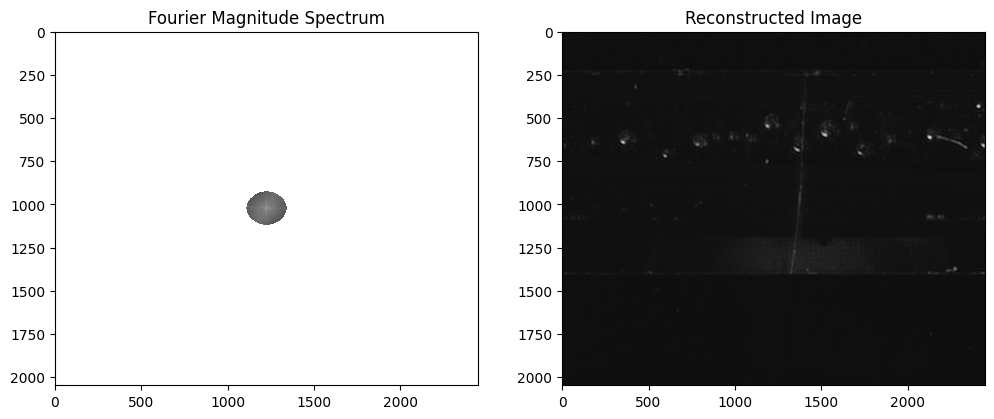

array([[5284.34366494, 5356.40268532, 5406.60992784, ..., 4970.13033498,
        5087.09815739, 5193.31698926],
       [5325.15477523, 5403.85450297, 5460.37273255, ..., 4991.10977421,
        5114.48012172, 5227.37069965],
       [5346.11141649, 5430.92626755, 5493.59260625, ..., 4995.90308098,
        5124.12663812, 5242.45661945],
       ...,
       [5053.58893649, 5105.58578659, 5138.70011917, ..., 4811.42319755,
        4903.03138094, 4985.0195236 ],
       [5146.49629941, 5204.91415379, 5243.16394115, ..., 4879.22939981,
        4979.96507628, 5070.39450919],
       [5224.26317751, 5289.46128908, 5333.48786091, ..., 4932.64035011,
        5041.95044103, 5140.57096801]])

In [136]:
import cv2
import numpy as np

f_cp = f_image.copy()

# 假設 f_cp 是已經存在的 numpy array
height, width = f_cp.shape  # 取得圖像的高度和寬度

# 創建一個全為0的遮罩
mask = np.zeros((height, width), dtype=np.uint8)

# 設定橢圓的中心、長軸、短軸、旋轉角度
center = (width // 2, height // 2)
axes = (width // 20, height // 20)  # 橢圓的長軸和短軸
angle = 0  # 旋轉角度，0度表示橢圓的長軸與水平軸平行

# 繪製白色橢圓（遮罩）在黑色背景上
cv2.ellipse(mask, center, axes, angle, 0, 360, 255, -1)  # -1 表示填充

# 將遮罩應用到 f_cp
f_cp_masked = f_cp * mask

# f_cp_masked[width // 2, height // 2]=0

# 顯示應用遮罩後的結果
i_fourier_show(f_cp_masked)


## 模糊

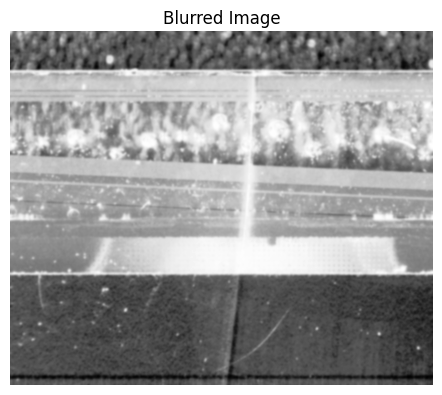

In [215]:
image = hs 

# 定義高斯模糊的核大小，必須為奇數
kernel_size = (31, 31)  # 可以根據需要調整
sigma = 0  # 可以設定為 0，OpenCV 將根據核大小自動計算 sigma

# 應用高斯模糊
blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

# 顯示原圖與模糊後的圖片
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()

## 門檻化

In [223]:
# 計算圖片的均值和標準差
image = hs # origin add_image hs

mean = np.mean(image)
std_dev = np.std(image)

mean, std_dev, mean+std_dev, mean+2*std_dev, mean+3*std_dev

(150.03414976830575,
 63.28380414868728,
 213.31795391699302,
 276.6017580656803,
 339.8855622143676)

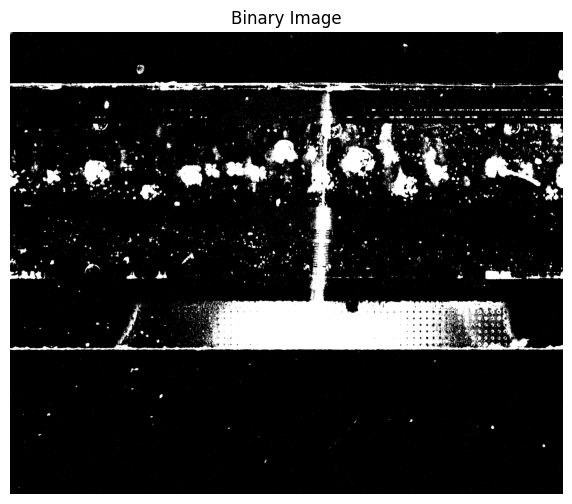

In [225]:
# 選擇門檻值，這裡選擇像素值127作為門檻值（可以根據直方圖選擇）
threshold_value = 230

# 根據門檻值進行二值化
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# 顯示二值化後的圖片
plt.figure(figsize=(8, 6))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

In [62]:
print(origin)

[[  0   0 222 ...  20  19  20]
 [ 23  23  23 ...  20  20  20]
 [ 23  23  22 ...  20  20  20]
 ...
 [ 17  17  18 ...  17  17  17]
 [ 18  18  18 ...  17  17  16]
 [ 17  17  18 ...  17  17  17]]


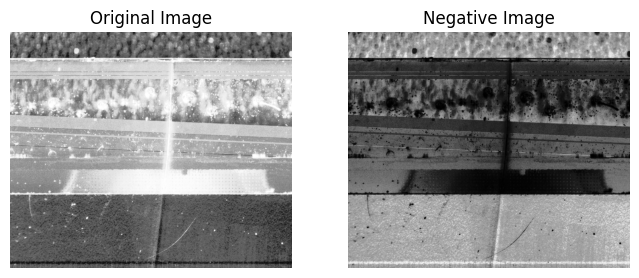

In [226]:
# 將圖像轉換為負片
negative_image = cv2.bitwise_not(image)

# 顯示結果
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.show()

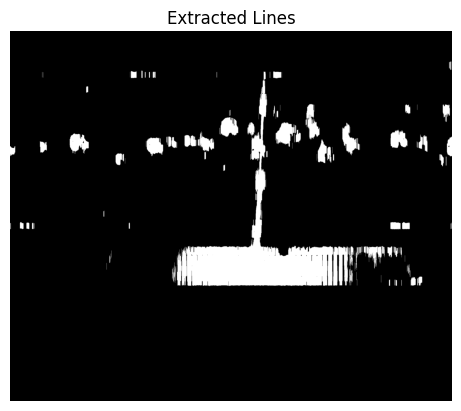

In [227]:
# 定義形態學操作的結構元素，這裡使用線形結構元素
kernel_length = 30  # 根據需要調整
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

# 進行形態學操作以提取直線
lines_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

plt.imshow(lines_image, cmap='gray')
plt.title('Extracted Lines')
plt.axis('off')

plt.show()

In [132]:
def create_blank(image):
    """創建一個空白圖像"""
    
    return np.zeros_like(image) # 單通道的空白圖像

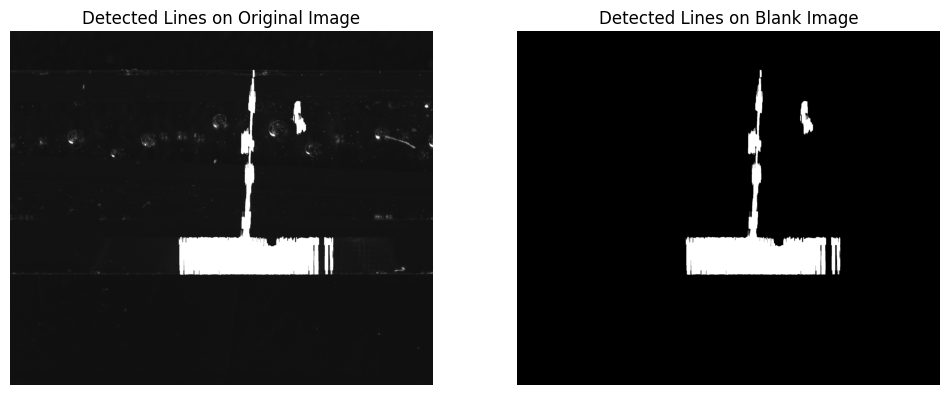

In [187]:
# 複製原始圖片和創建空白圖片
image = origin.copy()
blank_image = create_blank(origin)


# 找到所有輪廓
contours, _ = cv2.findContours(lines_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 設置最小線長度
min_line_length = 1000  # 根據需要調整

# 過濾掉短線條
for contour in contours:
    if cv2.arcLength(contour, closed=False) > min_line_length:
        cv2.drawContours(image, [contour], -1, (255), thickness=cv2.FILLED)
        cv2.drawContours(blank_image, [contour], -1, (255), thickness=cv2.FILLED)
    
# 顯示結果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Detected Lines on Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blank_image, cmap='gray')
plt.title('Detected Lines on Blank Image')
plt.axis('off')

plt.show()

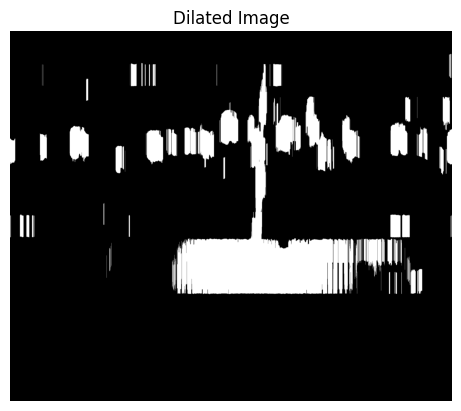

In [181]:
# 進行膨脹操作以粗化線條和連接靠近的線條
dilated_image = cv2.dilate(lines_image, kernel, iterations=3)

plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.show()


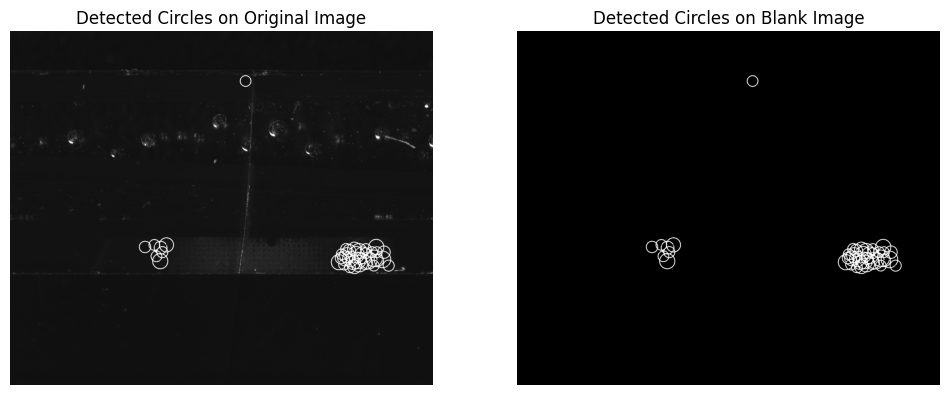

In [180]:
# 複製原始圖片和創建空白圖片
image = origin.copy()
blank_image = create_blank(origin)

# 檢測圓形
circles = cv2.HoughCircles(binary_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=30, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        # 繪製圓心
        cv2.circle(image, center, 1, (0, 100, 100), 3)
        cv2.circle(blank_image, center, 1, (0, 255, 255), 3)
        # 繪製圓環
        cv2.circle(image, center, radius, (255, 0, 255), 3)
        cv2.circle(blank_image, center, radius, (255, 0, 255), 3)

# 顯示結果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Detected Circles on Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blank_image, cmap='gray')
plt.title('Detected Circles on Blank Image')
plt.axis('off')

plt.show()

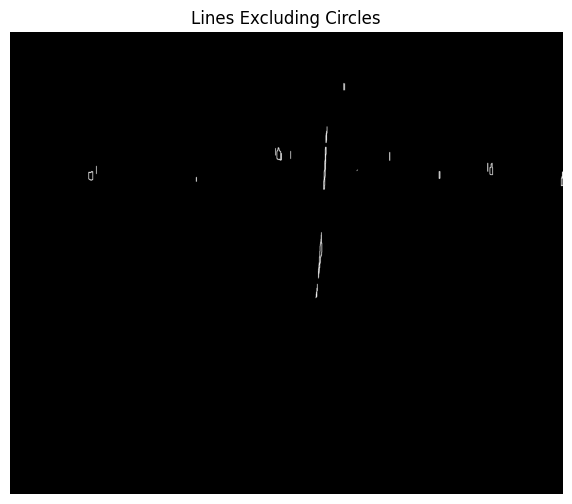

In [160]:
# 複製原始圖片和創建空白圖片
image = origin.copy()
blank_image = create_blank(origin)

# 找到所有輪廓
contours, _ = cv2.findContours(lines_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 設置最小線長度
min_line_length = 10  # 根據需要調整

# 繪製長線條
for contour in contours:
    if cv2.arcLength(contour, closed=False) > min_line_length:
        cv2.drawContours(blank_image, [contour], -1, (255, 255, 255), thickness=2)

# 檢測圓形
circles = cv2.HoughCircles(binary_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=20, maxRadius=100)

# 將圓形區域設為黑色
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(blank_image, center, radius, (0, 0, 0), thickness=cv2.FILLED)

# 顯示結果
plt.figure(figsize=(12, 6))
plt.imshow(blank_image, cmap='gray')
plt.title('Lines Excluding Circles')
plt.axis('off')
plt.show()

C:\Users\112033645\AppData\Local\Temp\ipykernel_7116\3036416938.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)  # 將點轉換為整數


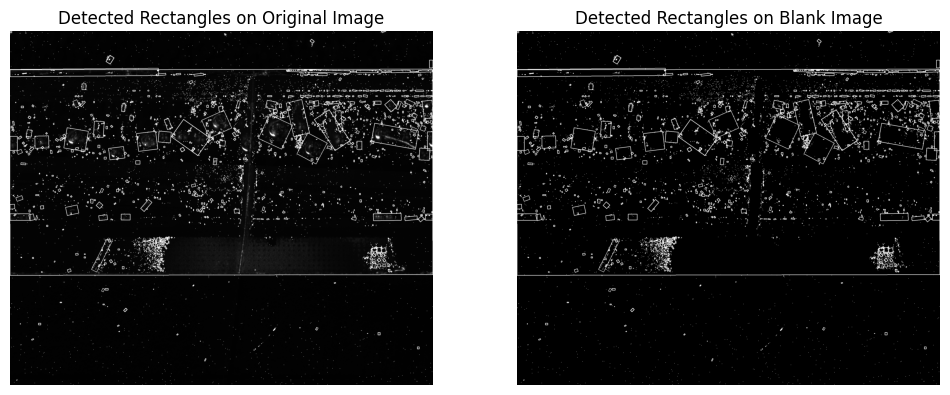

In [228]:
# 複製原始圖片和創建空白圖片
image = origin.copy()
blank_image = create_blank(origin)

# 找到輪廓
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 繪製矩形
for contour in contours:
    rect = cv2.minAreaRect(contour)  # 計算最小外接矩形
    box = cv2.boxPoints(rect)  # 獲取矩形四個角的點
    box = np.int0(box)  # 將點轉換為整數
    cv2.drawContours(image, [box], 0, 255, 2)  # 在原圖上繪製矩形
    cv2.drawContours(blank_image, [box], 0, 255, 2)  # 在空白圖像上繪製矩形，使用白色 (255)

# 顯示結果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Detected Rectangles on Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blank_image, cmap='gray')
plt.title('Detected Rectangles on Blank Image')
plt.axis('off')

plt.show()

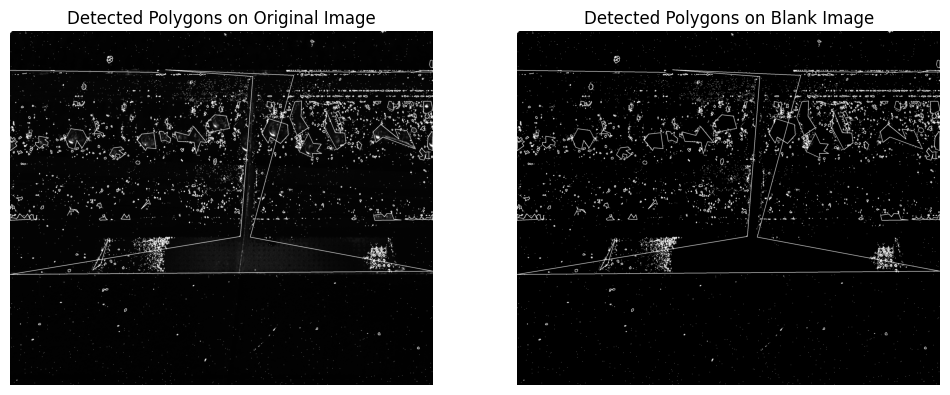

In [229]:
# 複製原始圖片和創建空白圖片
image = origin.copy()
blank_image = create_blank(image)

# 找到輪廓
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 繪製多邊形
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)  # 設置逼近精度
    approx = cv2.approxPolyDP(contour, epsilon, True)  # 逼近輪廓為多邊形
    cv2.drawContours(image, [approx], 0, 255, 2)  # 在原圖上繪製多邊形
    cv2.drawContours(blank_image, [approx], 0, 255, 2)  # 在空白圖像上繪製多邊形

# 顯示結果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Detected Polygons on Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blank_image, cmap='gray')
plt.title('Detected Polygons on Blank Image')
plt.axis('off')

plt.show()


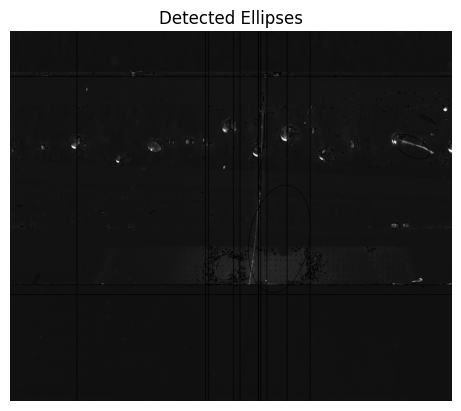

In [114]:
# 複製原始圖片以便顯示
image = origin.copy()

# 找到輪廓
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 繪製椭圓
for contour in contours:
    if len(contour) >= 5:  # 檢查輪廓點數量是否足夠擬合椭圓
        try:
            ellipse = cv2.fitEllipse(contour)
            # 檢查擬合結果的尺寸是否有效
            if ellipse[1][0] > 0 and ellipse[1][1] > 0:
                cv2.ellipse(image, ellipse, (0, 255, 0), 2)
        except cv2.error as e:
            print(f"OpenCV error: {e}")

plt.imshow(image, cmap='gray')
plt.title('Detected Ellipses')
plt.axis('off')
plt.show()